In [2]:
import pandas as pd
import re
pd.options.display.max_columns = 30  #Can't have too many columns.
import glob
from datetime import datetime
import dateutil.parser
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= (17,5)
from collections import Counter
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
import langid
from tqdm import tqdm

In [3]:
#Checking if all the speeches are loaded or not
folder = nltk.data.find(
    'A:/Data Analysis Jupyter/Campaign-Analytics/Speeches/narendramodi/2017')
paths = glob.glob('A:/Data Analysis Jupyter/Campaign-Analytics/Speeches/narendramodi/2017/*')
len(paths)

99

In [72]:
nm_speeches = [ ]  #Empty dataframe to store all the content of speeches
for path in paths:
    corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '.*\.txt')
    number_of_sentences = len(corpusReader.sents())
    number_of_words = len(
        [word for sentence in corpusReader.sents() for word in sentence])
    number_of_fids = len(corpusReader.fileids())
    # opening the files and converting it to a dictionary
    with open(path, encoding="utf-8") as speech_file:
        filename = path.split('/')[-1]
        date = re.search(r"(\d+)_([a-zA-Z]+)_(\d+)", filename)
        if date:
            date = datetime.strptime(date.group(0), '%d_%b_%Y')
        else:
            date = np.nan
        speech = {
            'filename' : path.split('/')[-1],
            'content' : speech_file.read(),
            'date' : date,
            'number_of_sentences' : number_of_sentences,
            'number_of_words' : number_of_words,
            'average_sentence_length': number_of_words/number_of_sentences
        }   
    nm_speeches.append(speech)
nm_df = pd.DataFrame(nm_speeches)
nm_df.head()

,average_sentence_length,content,date,filename,number_of_sentences,number_of_words
0,165.501052,"Governor of Andhra Pradesh, Shri E. S. L. Nara...",2017-01-03,2017\421_03_Jan_2017_PMs_address_at_the_inaugu...,5227,865074
1,165.501052,"à¤¶à¥à¤°à¥ à¤ªà¤à¤¨à¤¾ à¤¸à¤¾à¤¹à¤¿à¤¬, à¤...",2017-01-05,2017\422_05_Jan_2017_PMs_address_at_350th_Birt...,5227,865074
2,165.501052,"Your Excellency, Prime Minister Antonio Costa,...",2017-01-07,2017\423_07_Jan_2017_Media_Statement_by_the_PM...,5227,865074
3,165.501052,"Excellencies and friends,\nTo begin with, let ...",2017-01-08,2017\424_08_Jan_2017_PMs_address_at_the_inaugu...,5227,865074
4,165.501052,à¤ªà¥à¤¯à¤¾à¤°à¥ à¤­à¤¾à¤à¤¯à¥à¤ à¤à¤° à...,2017-01-09,2017\425_09_Jan_2017_PMs_address_at_Bhumi_Puja...,5227,865074


In [73]:
nm_df.index = nm_df['date']  #Setting a dateindex
nm_df.head()

,average_sentence_length,content,date,filename,number_of_sentences,number_of_words
date,,,,,,
2017-01-03,165.501052,"Governor of Andhra Pradesh, Shri E. S. L. Nara...",2017-01-03,2017\421_03_Jan_2017_PMs_address_at_the_inaugu...,5227,865074
2017-01-05,165.501052,"à¤¶à¥à¤°à¥ à¤ªà¤à¤¨à¤¾ à¤¸à¤¾à¤¹à¤¿à¤¬, à¤...",2017-01-05,2017\422_05_Jan_2017_PMs_address_at_350th_Birt...,5227,865074
2017-01-07,165.501052,"Your Excellency, Prime Minister Antonio Costa,...",2017-01-07,2017\423_07_Jan_2017_Media_Statement_by_the_PM...,5227,865074
2017-01-08,165.501052,"Excellencies and friends,\nTo begin with, let ...",2017-01-08,2017\424_08_Jan_2017_PMs_address_at_the_inaugu...,5227,865074
2017-01-09,165.501052,à¤ªà¥à¤¯à¤¾à¤°à¥ à¤­à¤¾à¤à¤¯à¥à¤ à¤à¤° à...,2017-01-09,2017\425_09_Jan_2017_PMs_address_at_Bhumi_Puja...,5227,865074


In [74]:
nm_df.describe()

,average_sentence_length,number_of_sentences,number_of_words
count,9.900000e+01,99.0,99.0
mean,1.655011e+02,5227.0,865074.0
std,1.142654e-13,0.0,0.0
min,1.655011e+02,5227.0,865074.0
25%,1.655011e+02,5227.0,865074.0
50%,1.655011e+02,5227.0,865074.0
75%,1.655011e+02,5227.0,865074.0
max,1.655011e+02,5227.0,865074.0


Disparity between mean and median

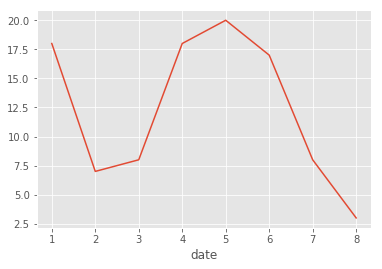

In [75]:
plt.style.use('ggplot')
nm_df.groupby(by=nm_df.index.month)['filename'].count().plot()

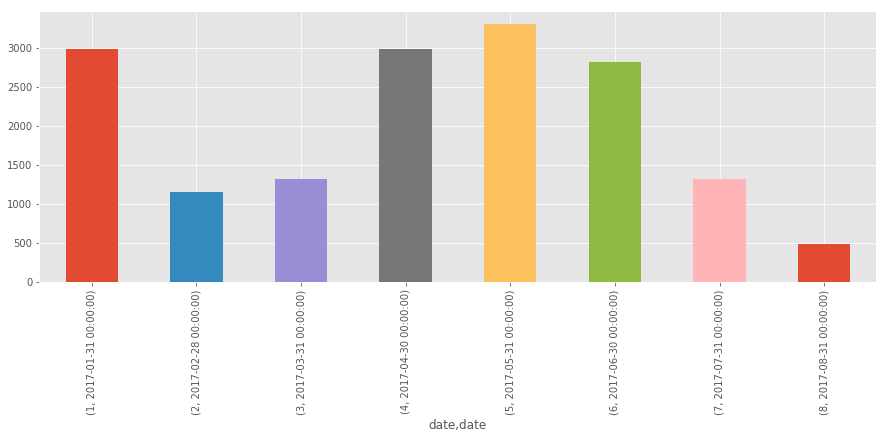

In [88]:
nm_df['average_sentence_length'].groupby(
    by=nm_df.index.month).resample('m').sum().plot(
        figsize=(15, 5), kind='bar')

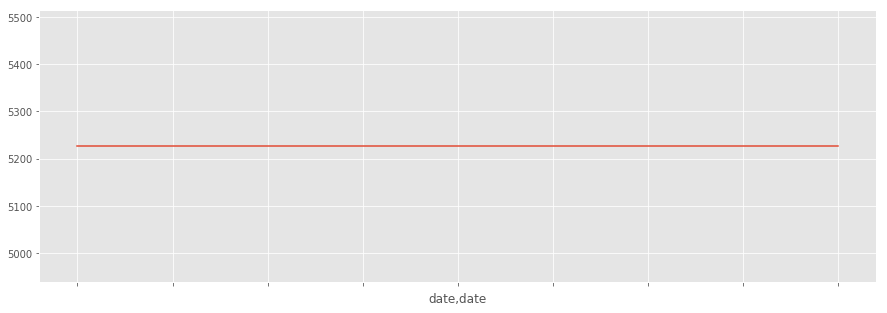

In [89]:
nm_df['number_of_sentences'].groupby(
    by=nm_df.index.year).resample('q').mean().plot(figsize=(15, 5))

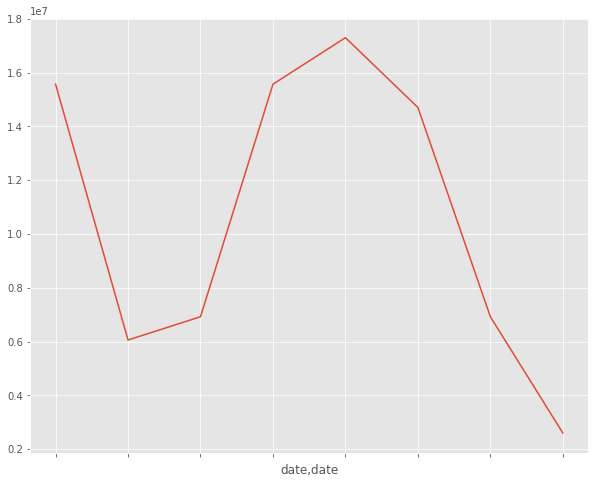

In [92]:
nm_df['number_of_words'].groupby(
    by=nm_df.index.year).resample('M').sum().plot(figsize=(10, 8))

# Word Occurances in his speeches

In [93]:
list_of_words = [
    "india", "indian", "indians", "freedom", "democracy", "nation", "world",
    "environment", "oil", "jobs", "education", "employment", "security",
    "terrorism", "pakistan", "china", "u.s", "america", "u.s.a", "i", "we",
    "you", "our", "ours", "me"
]

In [94]:
def get_word_time_trend(x, word):
    text_string = re.sub('', '', x).lower().split()
    c = 0
    for w in text_string:
        if (w == word):
            c += 1
    return c

In [95]:
def normalize(x, y):
    return (1000 * x) / y

In [97]:
df = nm_df.copy()

In [98]:
for word in list_of_words:
    df['t_' + word] = df.content.apply(lambda x: get_word_time_trend(x, word))

In [99]:
df2 = df[df.index.isnull() == False]

In [100]:
for word in list_of_words:
    df2['n_' + word] = df2.apply(
        lambda x: normalize(x['t_' + word], x['number_of_words']), axis=1)

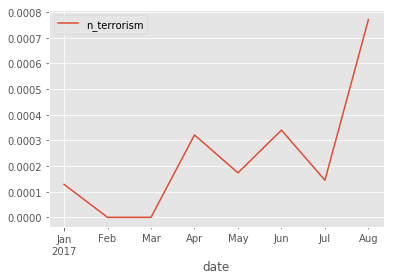

In [101]:
df2.filter(items=['n_terrorism']).resample('m').mean().plot()

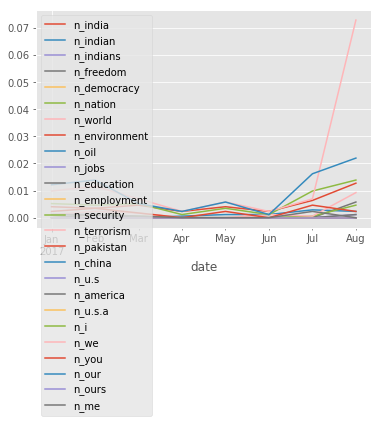

In [124]:
df2.filter(regex = 'n_').resample('m').median().plot();
plt.legend(loc='upper left')
plt.show()

In [2]:
import re

In [18]:
xx = "02 Mar,2018"
date = re.search(r"(\d\d)\s[(a-zA-Z)]+(,)(2018)", xx)
print(date)

<re.Match object; span=(0, 11), match='02 Mar,2018'>
